# August 29th, 2018
## Benjamin Adam Catching
## Polio-virus DIPs Project
## Andino Lab

The droplet images by themselves do not have sufficient information in the distribution of pixel intensities; the distribution of pixel intensities is not sufficiently useful to separate droplets containing cells from those that do not contain cells.  

Maybe a transform of the image that makes use of the halo that is typically surrounding the cell would be of use. The goal is to have an accurate perimeter that envelopes the cell image. 

In [55]:
# Import the important packages
import glob
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import skimage
import scipy
import pandas as pd
import os
import sys

In [2]:
# Define the location of the files
bulk_cell_dir = '../../data/07.27_HeLa_TIP_Hong/'

# Define the six directories that contain image files
set_1 = '#1/10x-[0-9].tif'
set_2 = '#2/10x-[0-9].tif'
set_3 = '#3/10x-[0-9].tif'

In [3]:
# Read in the files
group_1 = sorted(glob.glob(bulk_cell_dir + set_1))
group_2 = sorted(glob.glob(bulk_cell_dir + set_2))
group_3 = sorted(glob.glob(bulk_cell_dir + set_3))

In [4]:
# Import the processing script
import microfluidics_analysis as ma

In [5]:
group_1_bright, group_1_gfp = ma.droplet_save(group_1)
group_2_bright, group_2_gfp = ma.droplet_save(group_2)
group_3_bright, group_3_gfp = ma.droplet_save(group_3)

print(len(group_1_bright))
print(len(group_2_bright))
print(len(group_3_bright))

477
413
407


In [134]:
# Bring the previously determined droplets with cells values from yesterday
group_1_cell_numbers = np.array([4, 9, 10, 11, 24, 37, 38, 43, 45, 47, 49, 57, 72, 75, 86, 99, 
                                 111, 116, 117, 128, 135, 139, 145, 152, 155, 161, 167, 171, 174, 
                                 182, 184, 187, 203, 204, 212, 226, 231, 235, 236, 240, 266, 
                                 269, 270, 272, 277, 282, 286, 292, 294, 296, 301, 305, 306, 323, 
                                 325, 326, 332, 342, 345, 350, 351, 352, 356, 371, 385, 403, 404, 
                                 421, 427, 429, 432, 437, 441, 446, 447, 450, 461, 462, 473])

group_2_cell_numbers = np.array([0, 6, 20, 21, 32, 40, 44, 47, 50, 64, 67, 70, 75, 77, 98, 
                                 109, 118, 123, 133, 134, 138, 145, 149, 150, 152, 156, 159,
                                 162, 163, 165, 167, 170, 178, 191, 203, 207, 209, 210, 214,
                                 215, 225, 228, 229, 230, 233, 245, 246, 248, 250, 254, 264, 
                                 271, 291, 299, 305, 312, 331, 333, 335, 339, 340, 343, 354,
                                 357, 359, 365, 375, 376, 388, 390, 393, 395, 411])
group_3_cell_numbers = np.array([2, 4, 10, 11, 17, 21, 22, 26, 28, 40, 44, 49, 52, 53, 55, 62, 65,
                                 67, 71, 78, 84, 86, 87, 90, 91, 98, 100, 101, 103, 104, 107, 108,
                                 109, 115, 116, 119, 121, 130, 131, 132, 133, 152, 157, 160, 170, 
                                 171, 175, 176, 177, 185, 187, 197, 204, 205, 207, 208, 210, 213, 
                                 214, 215, 216, 217, 221, 226, 233, 235, 238, 246, 253, 256, 265, 
                                 266, 272, 278, 280, 285, 286, 287, 288, 292, 297, 302, 310, 311, 
                                 312, 314, 318, 319, 322, 325, 333, 334, 341, 344, 346, 353, 354, 
                                 357, 366, 372, 376, 380, 395, 402, 403, 404, 406])

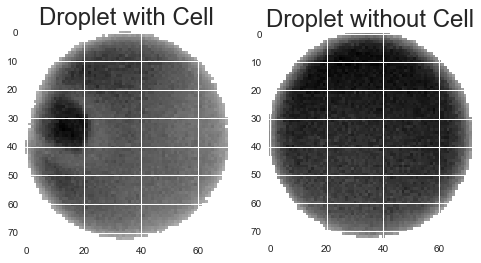

In [23]:
# Look at a single droplet
drop_with_cell = group_1_bright[group_1_cell_numbers[3]]
drop_without_cell = group_1_bright[0]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(drop_with_cell)
ax[0].set_title('Droplet with Cell', size=24)
ax[1].imshow(drop_without_cell)
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

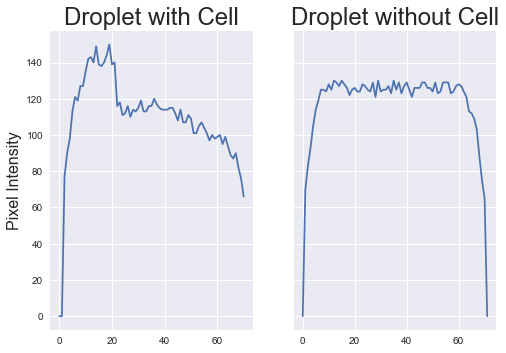

In [24]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(drop_with_cell[30])
ax[0].set_title('Droplet with Cell', size=24)
ax[0].set_ylabel('Pixel Intensity', size=16)
ax[1].plot(drop_without_cell[25])
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

This suggests that the cell is considerably brighter than the surrounding that is part of the droplet.

In [29]:
# Find the non-zero mean value of the droplet
def find_mean_std(image):
    """
    From the 2-D 8-bit image, find the non-zero values and 
    return the mean and standard deviation.
    """
    
    # Flatten the image
    flatten_image = image.flatten()
    # Only include non-zeros
    non_zero_image = np.array([x for x in flatten_image if x != 0])
    # Return the mean and standard deviation
    
    return non_zero_image.mean(), non_zero_image.std()

In [31]:
# Mean values of the two test droplets
drop_with_cell_mean, drop_with_cell_std = find_mean_std(drop_with_cell)
drop_without_cell_mean, drop_without_cell_std = find_mean_std(drop_without_cell)

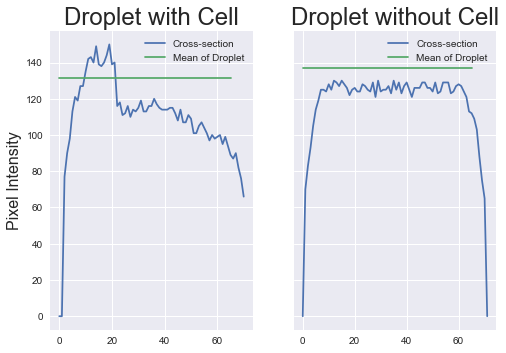

In [33]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(drop_with_cell[30], label='Cross-section')
ax[0].plot([0, 65], [drop_with_cell_mean+drop_with_cell_std*1.5]*2, label='Mean of Droplet')
ax[0].legend()
ax[0].set_title('Droplet with Cell', size=24)
ax[0].set_ylabel('Pixel Intensity', size=16)

ax[1].plot(drop_without_cell[25], label='Cross-section')
ax[1].plot([0, 65], [drop_without_cell_mean+drop_without_cell_std*1.5]*2, label='Mean of Droplet')
ax[1].legend()
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

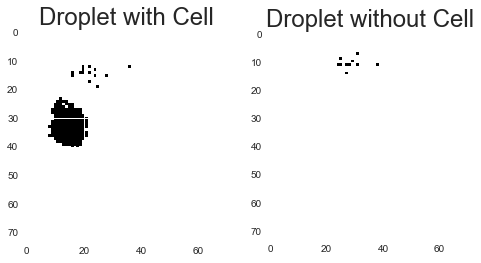

In [37]:
# Try this method of thresholding on both droplets
fig, ax = plt.subplots(1, 2)
# Threshold
thresh_cell = drop_with_cell > (drop_with_cell_mean+drop_with_cell_std*1.5)
ax[0].imshow(thresh_cell)
ax[0].set_title('Droplet with Cell', size=24)
thresh_no_cell = drop_without_cell > (drop_without_cell_mean + drop_without_cell_std*1.5)
ax[1].imshow(thresh_no_cell)
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

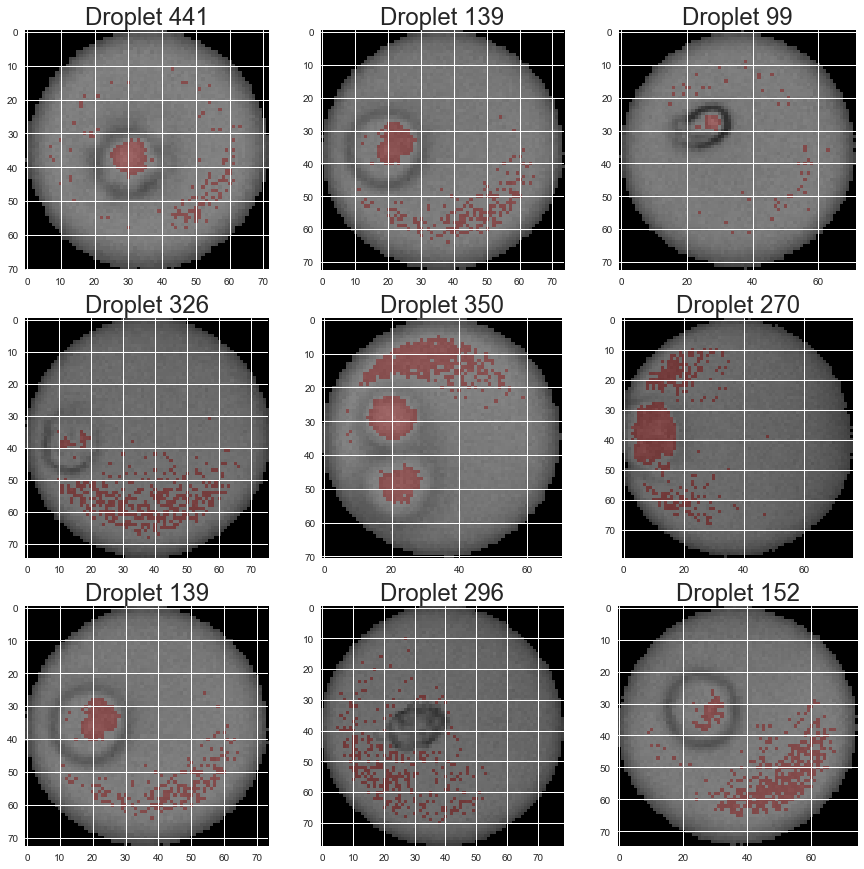

In [45]:
# Try this method on multiple droplets that contain cells
random_drop_with_cell = np.random.choice(group_1_cell_numbers, size=(3, 3))
# Set up plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Select droplet
        droplet_with_cell = group_1_bright[random_drop_with_cell[i, j]]
        # Create greyscale image
        temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
        # Find the mean and std
        cell_mean, cell_std = find_mean_std(droplet_with_cell)
        # Define the threshold
        thresh = cell_mean + cell_std
        # Apply the threshold
        thresh_cell = droplet_with_cell > thresh
        # Display the thresholded cell
        temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + thresh_cell * 200
        temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + thresh_cell * 200
        ax[i, j].imshow(temp_rgb)
        ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
plt.show()

In [103]:
# Try again to find the difference of the cross-section
drop_with_cell = group_1_bright[270]
drop_without_cell = group_1_bright[275]

drop_with_cell_mean, drop_with_cell_std = find_mean_std(drop_with_cell)
drop_without_cell_mean, drop_without_cell_std = find_mean_std(drop_without_cell)

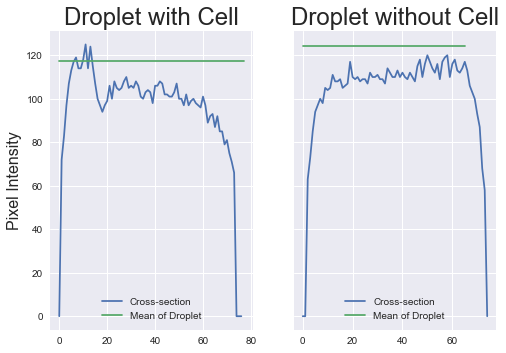

In [104]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2, sharey=True)
x_dim = len(drop_with_cell[0])
ax[0].plot(drop_with_cell[30], label='Cross-section')
ax[0].plot([0, x_dim], [drop_with_cell_mean+drop_with_cell_std*1.5]*2, label='Mean of Droplet')
ax[0].legend()
ax[0].set_title('Droplet with Cell', size=24)
ax[0].set_ylabel('Pixel Intensity', size=16)

ax[1].plot(drop_without_cell[25], label='Cross-section')
ax[1].plot([0, 65], [drop_without_cell_mean+drop_without_cell_std*1.5]*2, label='Mean of Droplet')
ax[1].legend()
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

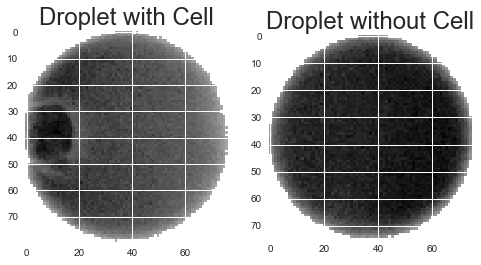

In [105]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2)
ax[0].imshow(drop_with_cell)
ax[0].set_title('Droplet with Cell', size=24)

ax[1].imshow(drop_without_cell)
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

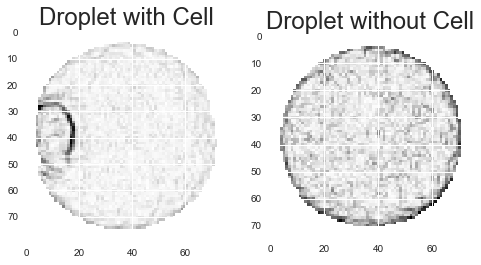

In [112]:
# Apply a Sobel filter

# Make masks
drop_with_cell_mask = drop_with_cell != 0
drop_without_cell_mask = drop_without_cell != 0
# Erode masks
drop_with_cell_mask = scipy.ndimage.binary_erosion(drop_with_cell_mask, iterations=3)
drop_without_cell_mask = scipy.ndimage.binary_erosion(drop_without_cell_mask, iterations=3)
# Apply Sobel filter
sobel_with_cell = skimage.filters.sobel(drop_with_cell, mask=drop_with_cell_mask)
sobel_without_cell = skimage.filters.sobel(drop_without_cell, mask=drop_without_cell_mask)
fig, ax = plt.subplots(1, 2)
ax[0].imshow(sobel_with_cell)
ax[0].set_title('Droplet with Cell', size=24)

ax[1].imshow(sobel_without_cell)
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

/Users/adam/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


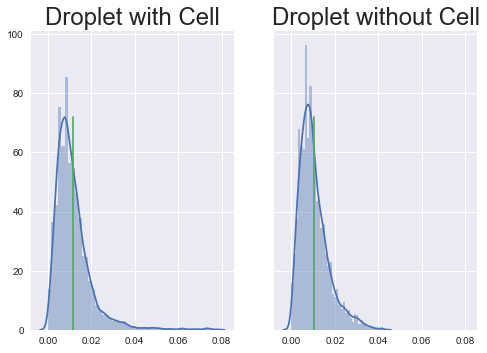

In [113]:
# Look at a histogram of the pixel intensities after a Sobel filter
drop_with_cell_mask_flat = sobel_with_cell.flatten()
drop_without_cell_mask_flat =sobel_without_cell.flatten()
# Remove the zeros from the flattened image
non_zero_with_cell = np.array([x for x in drop_with_cell_mask_flat if x != 0])
non_zero_without_cell = np.array([x for x in drop_without_cell_mask_flat if x != 0])

# Plot
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True)
_ = sns.distplot(non_zero_with_cell, ax=ax[0])
_ = ax[0].set_title('Droplet with Cell', size=24)
_ = ax[0].plot([non_zero_with_cell.mean()]*2, [0, 72])
_ = sns.distplot(non_zero_without_cell, ax=ax[1])
_ = ax[1].set_title('Droplet without Cell', size=24)
_ = ax[1].plot([non_zero_without_cell.mean()]*2, [0, 72])
plt.show()

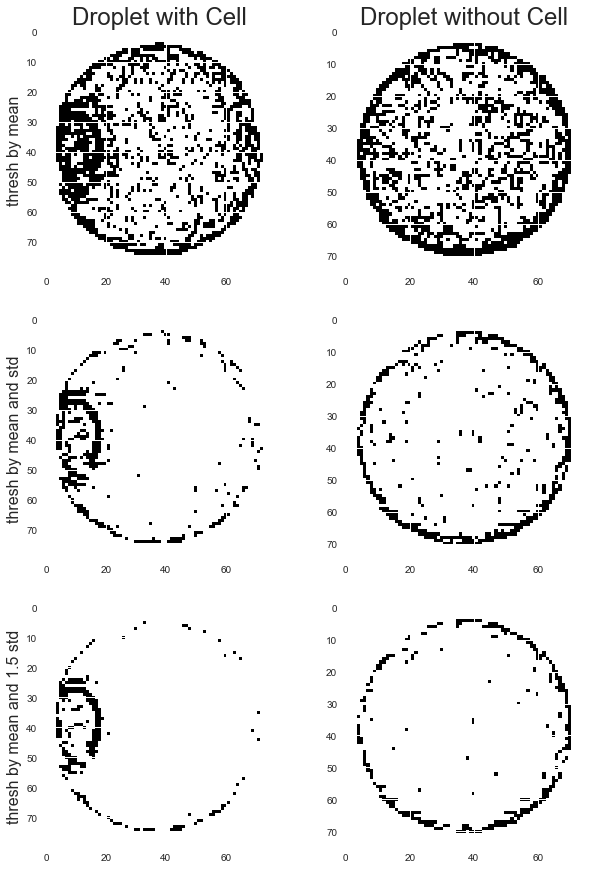

In [114]:
# Look at possible thresholding levels in terms of standard deviations
cell_thresh_1 = non_zero_with_cell.mean()
cell_thresh_2 = cell_thresh_1 + non_zero_with_cell.std()
cell_thresh_3 = cell_thresh_2 + non_zero_with_cell.std() * 0.5

no_cell_thresh_1 = non_zero_without_cell.mean()
no_cell_thresh_2 = no_cell_thresh_1 + non_zero_without_cell.std()
no_cell_thresh_3 = no_cell_thresh_2 + non_zero_without_cell.std() * 0.5

fig, ax = plt.subplots(3, 2, figsize=(10, 15))
_ = ax[0, 0].imshow(sobel_with_cell > cell_thresh_1)
_ = ax[0, 0].set_title('Droplet with Cell', size=24)
_ = ax[0, 0].set_ylabel('thresh by mean', size=16)
_ = ax[1, 0].imshow(sobel_with_cell > cell_thresh_2)
_ = ax[1, 0].set_ylabel('thresh by mean and std', size=16)
_ = ax[2, 0].imshow(sobel_with_cell > cell_thresh_3)
_ = ax[2, 0].set_ylabel('thresh by mean and 1.5 std', size=16)

_ = ax[0, 1].imshow(sobel_without_cell > no_cell_thresh_1)
_ = ax[0, 1].set_title('Droplet without Cell', size=24)
_ = ax[1, 1].imshow(sobel_without_cell > no_cell_thresh_2)
_ = ax[2, 1].imshow(sobel_without_cell > no_cell_thresh_3)

plt.show()

This method, applying a Sobel method followed by a threshold, has a chance of working. The sweet spot appears to be at the mean + std. The current procedure can start to go into a function that will be augmented.

In [122]:
def cell_segment_10x(droplet):
    """
    From a 2-D 8-bit numpy array return the same size numpy array 
    with the cell inside segmented
    """
    
    # Create mask for the Sobel transform
    temp_mask = droplet != 0
    # Erode the exterior
    temp_mask = scipy.ndimage.binary_erosion(temp_mask, iterations=3)
    # Apply the Sobel transform
    temp_sobel = skimage.filters.sobel(droplet, mask=temp_mask)
    # Look at a histogram of the pixel intensities after a Sobel filter
    temp_flat = temp_sobel.flatten()
    # Find the mean and standard deviation value of the Sobel intensities
    temp_mean = temp_flat.mean()
    temp_std = temp_flat.std()
    # Threshold the Sobel image
    temp_sobel_thresh = temp_sobel > (temp_mean + temp_std)
    
    return temp_sobel_thresh

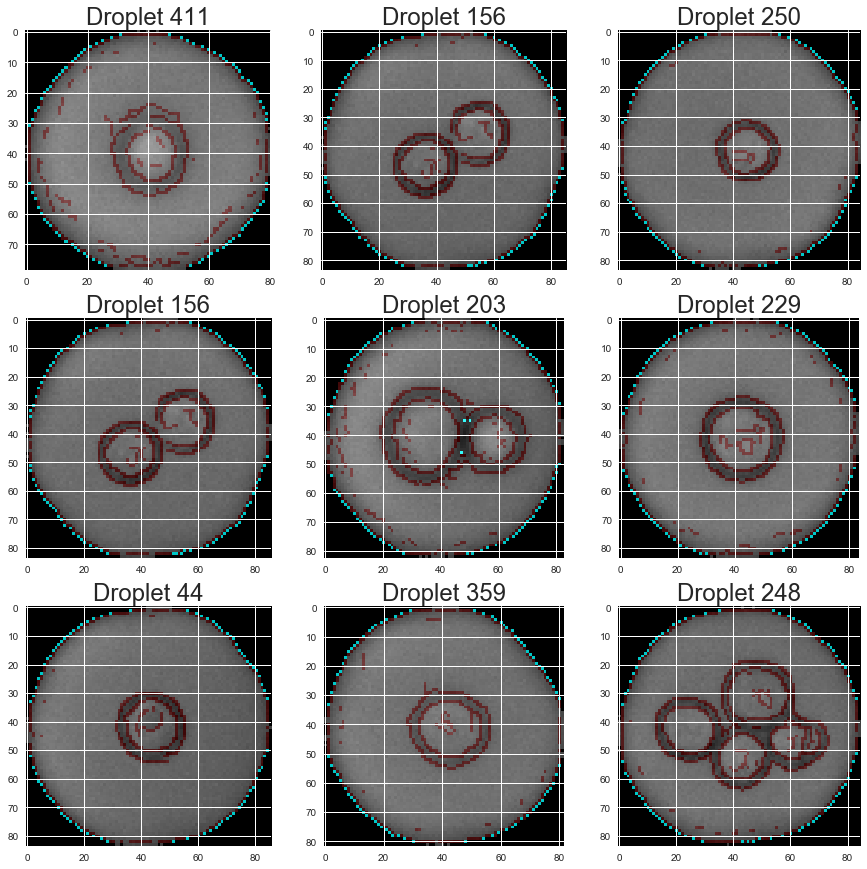

In [143]:
# Try this method on multiple droplets that contain cells
random_drop_with_cell = np.random.choice(group_2_cell_numbers, size=(3, 3))
# Set up plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Select droplet
        droplet_with_cell = group_2_bright[random_drop_with_cell[i, j]]
        # Create greyscale image
        temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
        # Apply the threshold
        thresh_cell = skimage.feature.canny(droplet_with_cell, sigma=0.5)
        # Display the thresholded cell
        temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + thresh_cell * 200
        temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + thresh_cell * 200
        ax[i, j].imshow(temp_rgb)
        ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
plt.show()

This method appears to work on most droplets, but an issue arises with a coffee ring-like structure on the outside of the image. It is consistent enough to warrant an implemented method to remove it.

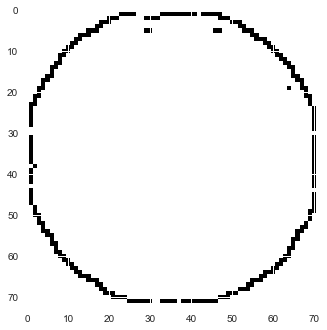

In [144]:
temp_canny = skimage.feature.canny(group_1_bright[0], sigma=.5)
plt.imshow(temp_canny)
plt.show()

All that work may have been pointless. Using the skimage canny filter, edges are easily revealed.

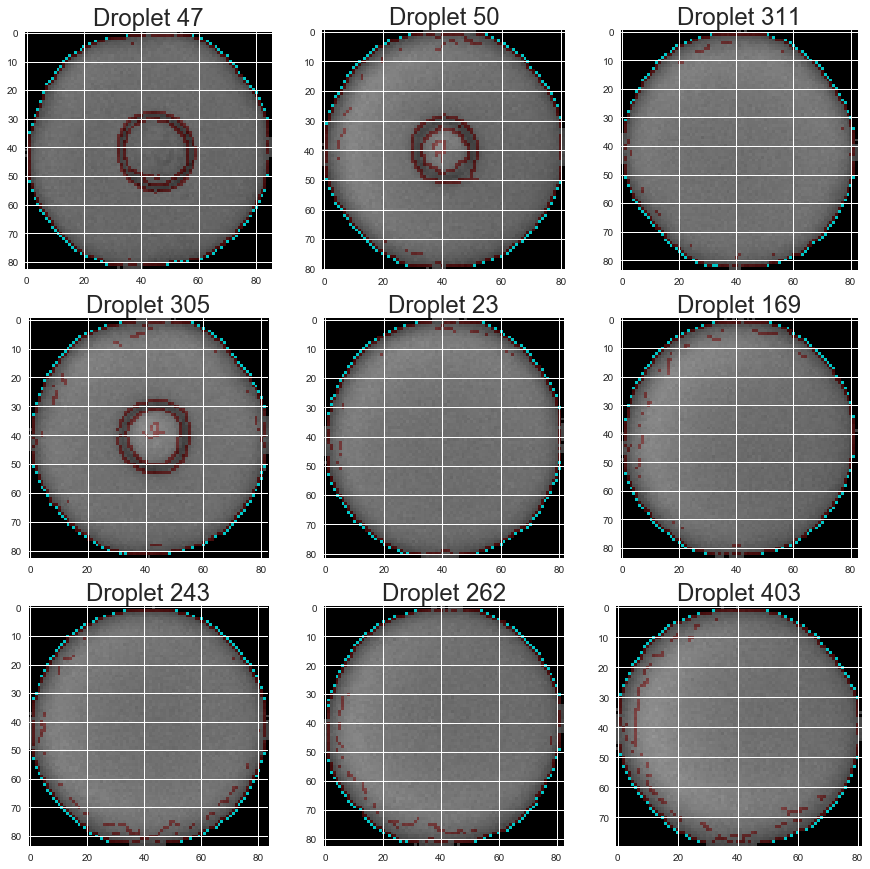

In [152]:
# Try this method on multiple droplets that contain cells
random_drop_with_cell = np.random.choice(len(group_2_bright), size=(3, 3))
# Set up plots
fig, ax = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    for j in range(3):
        # Select droplet
        droplet_with_cell = group_2_bright[random_drop_with_cell[i, j]]
        # Create greyscale image
        temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
        # Apply the threshold
        thresh_cell = skimage.feature.canny(droplet_with_cell, sigma=0.5)
        # Display the thresholded cell
        temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + thresh_cell * 200
        temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + thresh_cell * 200
        ax[i, j].imshow(temp_rgb)
        ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
plt.show()

The accuracy seems to be excellent, the edge of the droplet is the only part that needs to be removed.

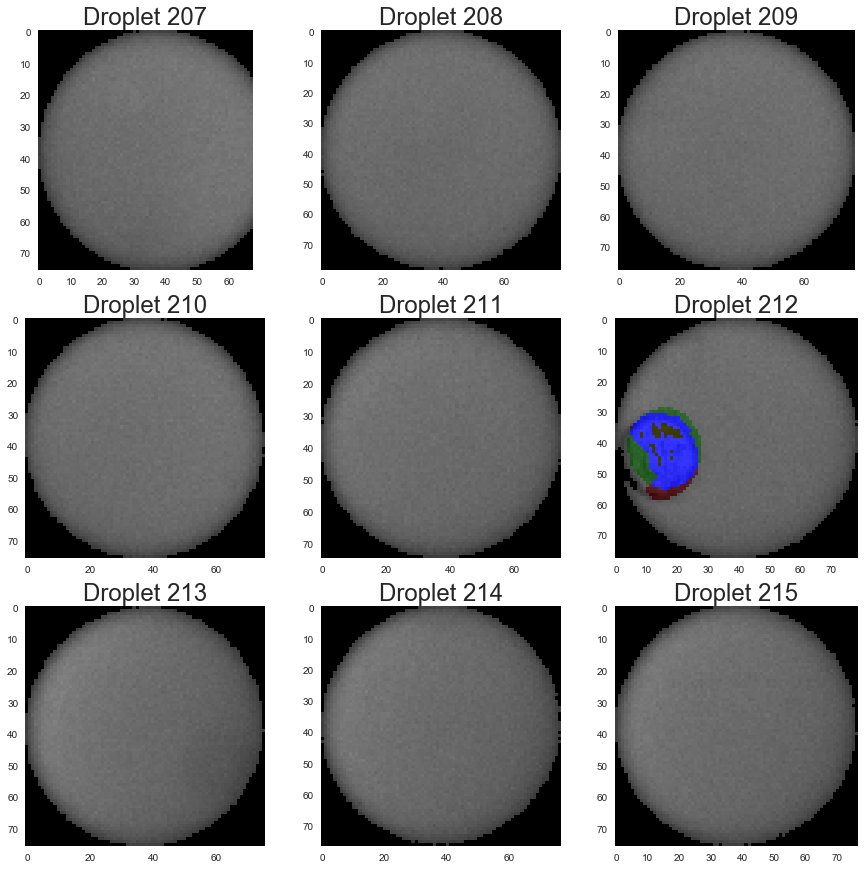

In [708]:
# Try this method on multiple droplets that contain cells
i = 9 * 23
random_drop_with_cell = np.arange(i, i+9).reshape(3, 3)
# Set up plots
with sns.axes_style('dark'):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    for i in range(3):
        for j in range(3):
            # Select droplet
            droplet_with_cell = group_1_bright[random_drop_with_cell[i, j]]
            # Create binary mask
            temp_mask = droplet_with_cell != 0
            # Erode the cell
            temp_mask = scipy.ndimage.binary_erosion(temp_mask, iterations=1)
            # Create greyscale image
            temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
            # Apply the threshold
            thresh_cell = skimage.feature.canny(droplet_with_cell, sigma=0.5)
            erode_thresh = thresh_cell * temp_mask
            # Assign properties
            cell_labels = skimage.measure.label(erode_thresh.astype(int))
            cell_props = skimage.measure.regionprops(cell_labels)

            # Initialize blank array
            cell_droplet_cells = np.zeros(droplet_with_cell.shape)

            for index, prop in enumerate(cell_props):
                # If the region properties are within the threshold
                if prop.area >= 10:
                    # Select the region
                    #print(index)
                    temp_seg = cell_labels==index+1
                    filled_seg = temp_seg
                    # Add to the blank image
                    cell_droplet_cells = cell_droplet_cells + filled_seg

            # Close any holes
            temp_close = scipy.ndimage.binary_closing(cell_droplet_cells, iterations=4)
            temp_fill = scipy.ndimage.binary_fill_holes(temp_close)
            temp_erode = scipy.ndimage.binary_erosion(temp_fill, iterations=2)
            temp_grow = scipy.ndimage.binary_dilation(temp_erode)
            # Display the thresholded cell
            temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + temp_grow * 200
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + temp_grow * 200
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + (group_1_gfp[random_drop_with_cell[i, j]] != 0) * 200
            temp_rgb[:, :, 0] = temp_rgb[:, :, 0] + (group_1_gfp[random_drop_with_cell[i, j]] != 0) * 200
            ax[i, j].imshow(temp_rgb)
            ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
    plt.show()

In [352]:
# Group 1 
false_pos_data = np.array([
    [1, 7, 0, 1], [1, 5, 0, 3], [1, 8, 0, 0], [0, 9, 0, 0],
    [2, 7, 0, 0], [2, 6, 0, 1], [0, 8, 0, 1], [0, 9, 0, 0],
    [2, 7, 0, 0], [1, 8, 0, 0], [0, 9, 0, 0], [1, 8, 0, 0],
    [2, 7, 0, 0], [2, 7, 0, 0], [1, 8, 0, 0], [1, 8, 0, 0],
    [2, 7, 0, 0], [2, 7, 0, 0], [2, 7, 0, 0], [1, 8, 0, 0],
    [1, 7, 0, 1], [3, 6, 0, 0], [0, 9, 0, 0], [2, 7, 0, 0],
    [1, 8, 0, 0], [0, 9, 0, 0], [1, 7, 0, 1], [4, 5, 0, 0],
    [0, 9, 0, 0], [1, 8, 0, 0], [2, 7, 0, 0], [4, 6, 0, 1],
    [0, 7, 0, 2], [3, 6, 0, 0], [2, 7, 0, 0], [1, 8, 0, 0],
    [1, 8, 0, 0], [3, 6, 0, 0], [0, 9, 0, 0], [3, 6, 0, 1],
    [4, 5, 0, 0], [0, 8, 0, 1], [1, 8, 0, 1], [1, 8, 0, 1],
    [0, 9, 0, 0], [3, 7, 0, 1], [0, 9, 0, 0], [2, 8, 0, 0],
    [2, 7, 0, 0], [2, 7, 0, 0], [2, 6, 0, 1], [1, 8, 0, 0],
    [2, 7, 0, 0], [2, 8, 0, 1]
])

In [368]:
group_1_total = false_pos_data.sum()
group_1_true_pos = false_pos_data[:, 0].sum()
group_1_false_neg = false_pos_data[:, 3].sum()
percent_found = group_1_true_pos / (group_1_true_pos + group_1_false_neg) * 100
drops_occupied = (group_1_true_pos + group_1_false_neg) / group_1_total * 100
print(f'{percent_found} % of the cells were detected in droplets for group 1')
print(f'{round(drops_occupied, 2)} % of the droplets contained a cell')

81.25 % of the cells were detected in droplets for group 1
19.35 % of the droplets contained a cell


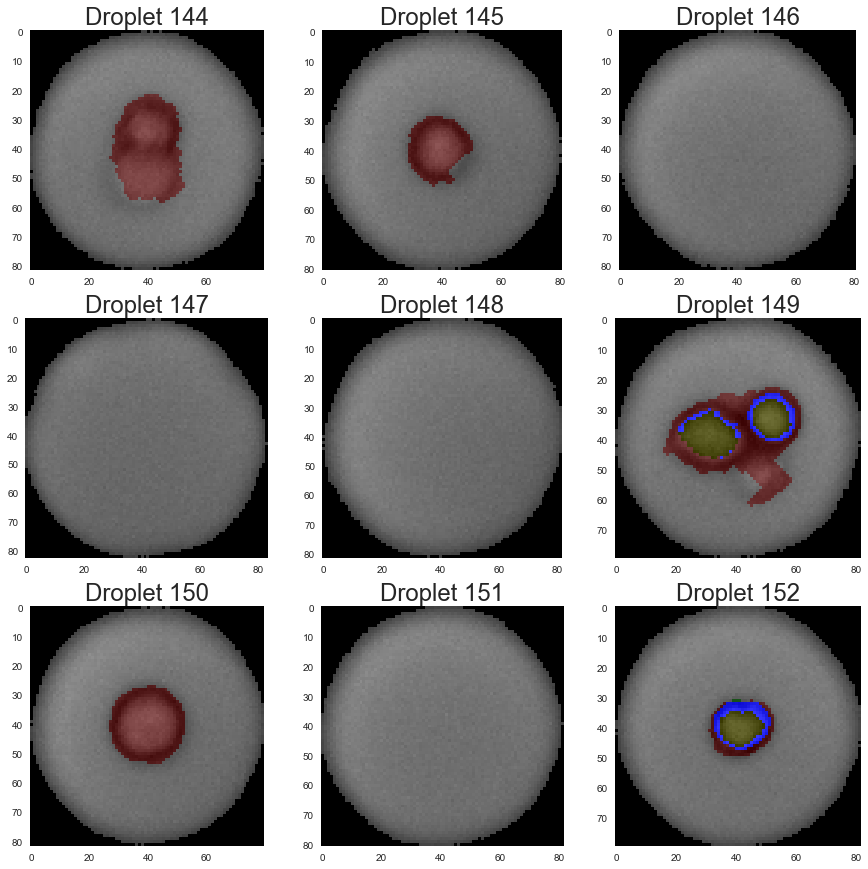

In [716]:
# Try this method on multiple droplets that contain cells
i = 9 * 16
random_drop_with_cell = np.arange(i, i+9).reshape(3, 3)
# Set up plots
with sns.axes_style('dark'):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    for i in range(3):
        for j in range(3):
            # Select droplet
            droplet_with_cell = group_2_bright[random_drop_with_cell[i, j]]
            # Create binary mask
            temp_mask = droplet_with_cell != 0
            # Erode the cell
            temp_mask = scipy.ndimage.binary_erosion(temp_mask, iterations=1)
            # Create greyscale image
            temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
            # Apply the threshold
            thresh_cell = skimage.feature.canny(droplet_with_cell, sigma=0.25)
            erode_thresh = thresh_cell * temp_mask
            # Assign properties
            cell_labels = skimage.measure.label(erode_thresh.astype(int))
            cell_props = skimage.measure.regionprops(cell_labels)

            # Initialize blank array
            cell_droplet_cells = np.zeros(droplet_with_cell.shape)

            for index, prop in enumerate(cell_props):
                # If the region properties are within the threshold
                if prop.area >= 10:
                    # Select the region
                    #print(index)
                    temp_seg = cell_labels==index+1
                    filled_seg = temp_seg
                    # Add to the blank image
                    cell_droplet_cells = cell_droplet_cells + filled_seg

            # Close any holes
            temp_close = scipy.ndimage.binary_closing(cell_droplet_cells, iterations=4)
            temp_fill = scipy.ndimage.binary_fill_holes(temp_close)
            temp_erode = scipy.ndimage.binary_erosion(temp_fill, iterations=2)
            temp_grow = scipy.ndimage.binary_dilation(temp_erode)
            # Display the thresholded cell
            temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + temp_grow * 200
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + temp_grow * 200
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + (group_2_gfp[random_drop_with_cell[i, j]] != 0) * 200
            temp_rgb[:, :, 0] = temp_rgb[:, :, 0] + (group_2_gfp[random_drop_with_cell[i, j]] != 0) * 200
            ax[i, j].imshow(temp_rgb)
            ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
    plt.show()

In [408]:
# Group 2
false_pos_data = np.array([
    [2, 7, 0, 0], [0, 9, 0, 0], [2, 7, 0, 0], [2, 8, 0, 0],
    [2, 7, 0, 0], [2, 7, 0, 0], [0, 9, 0, 0], [0, 9, 0, 0],
    [3, 6, 0, 0], [3, 7, 0, 0], [0, 9, 0, 0], [1, 8, 0, 0],
    [0, 9, 0, 0], [1, 8, 0, 0], [3, 7, 0, 0], [3, 7, 0, 0],
    [1, 8, 0, 0], [8, 4, 0, 0], [3, 7, 0, 0], [7, 3, 0, 0],
    [1, 8, 0, 0], [0, 9, 0, 0], [1, 8, 0, 0], [2, 8, 0, 0], 
    [6, 4, 0, 0], [1, 8, 0, 0], [6, 4, 0, 0], [0, 9, 0, 0],
    [8, 4, 0, 0], [1, 8, 0, 0], [1, 8, 0, 0], [1, 8, 0, 0],
    [0, 9, 0, 0], [1, 8, 0, 0], [2, 7, 0, 0], [1, 8, 0, 0],
    [0, 9, 0, 0], [1, 8, 0, 0], [7, 4, 0, 0], [1, 8, 0, 0],
    [3, 6, 0, 0], [1, 8, 0, 0], [3, 7, 0, 0], [0, 9, 0, 0],
    [7, 4, 0, 0], [0, 9, 0, 0]
])

In [470]:
group_2_total = false_pos_data.sum()
group_2_true_pos = false_pos_data[:, 0].sum()
group_2_false_neg = false_pos_data[:, 3].sum()
percent_found = group_2_true_pos / (group_2_true_pos + group_2_false_neg) * 100
drops_occupied = (group_2_true_pos + group_2_false_neg) / group_2_total * 100
print(group_2_true_pos)
print(f'{percent_found} % of the cells were detected in droplets for group 2')
print(f'{round(drops_occupied, 2)} % of the droplets contained a cell')

98
100.0 % of the cells were detected in droplets for group 2
22.58 % of the droplets contained a cell


In [662]:
# Define the process to segment cells from image
def cell_segment_10x(droplet):
    """
    From a 2-D 8-bit numpy array return the same size numpy array 
    with the cell inside segmented
    """
    
    # Create binary mask
    temp_mask = droplet != 0
    # Erode the cell
    temp_mask = scipy.ndimage.binary_erosion(temp_mask, iterations=1)
    # Apply the threshold
    thresh_cell = skimage.feature.canny(droplet, sigma=0.5)
    erode_thresh = thresh_cell * temp_mask
    # Assign properties
    cell_labels = skimage.measure.label(erode_thresh.astype(int))
    cell_props = skimage.measure.regionprops(cell_labels)

    # Initialize blank array
    cell_droplet_cells = np.zeros(droplet.shape)

    for index, prop in enumerate(cell_props):
        # If the region properties are within the threshold
        if prop.area >= 10:
            # Select the region
            #print(index)
            temp_seg = cell_labels==index+1
            filled_seg = temp_seg
            # Add to the blank image
            cell_droplet_cells = cell_droplet_cells + filled_seg

    # Close any holes
    
    temp_close = scipy.ndimage.binary_closing(cell_droplet_cells, iterations=4)
    temp_fill = scipy.ndimage.binary_fill_holes(temp_close)
    temp_erode = scipy.ndimage.binary_erosion(temp_fill, iterations=2)
    temp_grow = scipy.ndimage.binary_dilation(temp_erode)
    
    # Remove small areas
    cell_labels = skimage.measure.label(temp_grow)
    cell_props = skimage.measure.regionprops(cell_labels)
    
    # Initialize blank array
    cell_droplet = np.zeros(droplet.shape)

    for index, prop in enumerate(cell_props):
        # If the region properties are within the threshold
        if prop.area >= 200:
            # Select the region
            #print(index)
            temp_seg = cell_labels==index+1
            filled_seg = temp_seg
            # Add to the blank image
            cell_droplet = cell_droplet + filled_seg
    
    if cell_droplet.max() == 0:
        return cell_droplet
    else:
        #cell_droplet = cell_droplet != 0
        distance = scipy.ndimage.distance_transform_edt(cell_droplet)
        local_maxi = skimage.feature.peak_local_max(distance, 
                                                    indices=False, 
                                                    footprint=skimage.morphology.disk(10), 
                                                    labels=cell_droplet)
        markers = skimage.measure.label(local_maxi)
        #markers *= -1
        labels_rw = skimage.segmentation.watershed(-distance, markers, mask=cell_droplet)
    
        return labels_rw


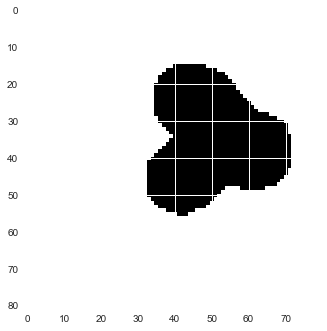

1


In [656]:
test_cell = group_3_bright[175]
test_image = cell_segment_10x(test_cell)
plt.imshow(test_image)
plt.show()
plt.tight_layout()
print(test_image.max())

In [616]:
total_cells = 0
for image in group_3_bright:
    num_cells = cell_segment_10x(image).max()
    #print(num_cells)
    total_cells += num_cells

In [617]:
total_cells

118.0

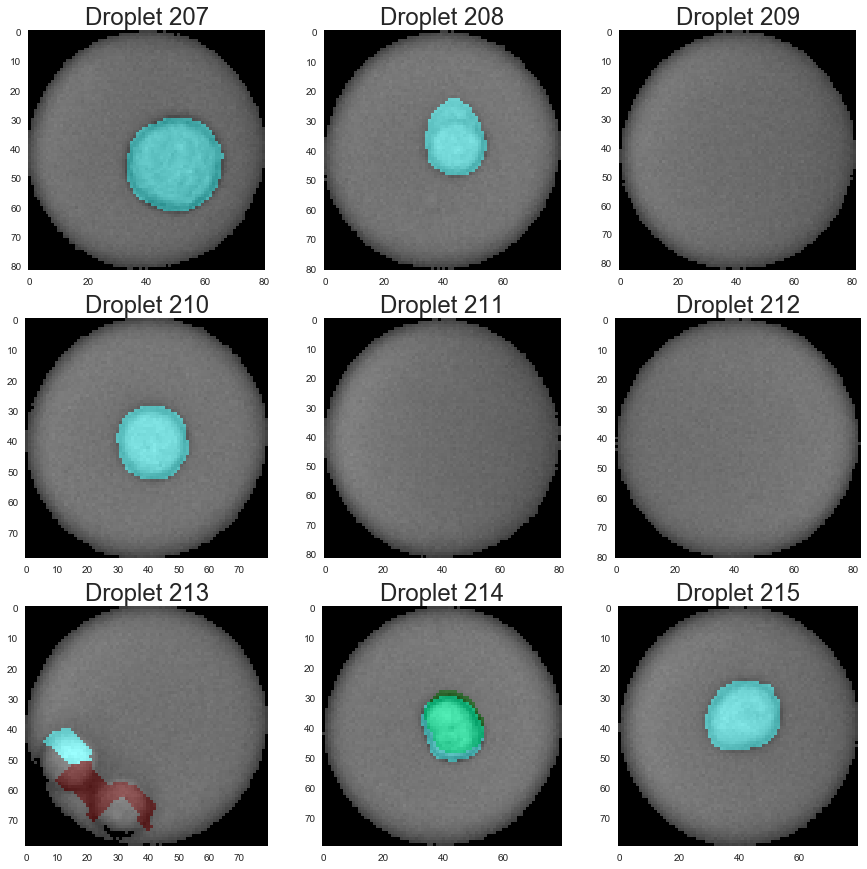

In [722]:
# Try this method on multiple droplets that contain cells
i = 9 * 23
random_drop_with_cell = np.arange(i, i+9).reshape(3, 3)
# Set up plots
with sns.axes_style('dark'):
    fig, ax = plt.subplots(3, 3, figsize=(15, 15))
    for i in range(3):
        for j in range(3):
            # Select droplet
            droplet_with_cell = group_3_bright[random_drop_with_cell[i, j]]
            # Create greyscale image
            temp_rgb = skimage.color.grey2rgb(droplet_with_cell)
            # Segment cell
            seg_cell = cell_segment_10x(droplet_with_cell)
            # Display the thresholded cell
            temp_rgb[:, :, 1] = temp_rgb[:, :, 1] + seg_cell * 100
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + seg_cell * 100
            temp_rgb[:, :, 2] = temp_rgb[:, :, 2] + (group_3_gfp[random_drop_with_cell[i, j]] != 0) * 200
            temp_rgb[:, :, 0] = temp_rgb[:, :, 0] + (group_3_gfp[random_drop_with_cell[i, j]] != 0) * 200
            ax[i, j].imshow(temp_rgb)
            ax[i, j].set_title(f'Droplet {random_drop_with_cell[i, j]}', size=24)
    plt.show()

In [696]:
# Group 2
false_pos_data = np.array([
    [2, 7, 0, 0], [4, 6, 0, 0], [4, 6, 0, 0], [1, 8, 0, 0], 
    [2, 7, 0, 0], [3, 6, 0, 0], [2, 7, 0, 0], [3, 6, 0, 0],
    [2, 7, 0, 0], [3, 6, 0, 0], [3, 6, 0, 2], [6, 4, 0, 0],
    [3, 5, 0, 1], [1, 7, 0, 1], [5, 5, 0, 0], [0, 9, 0, 0],
    [1, 8, 0, 0], [2, 7, 0, 0], [1, 8, 0, 0], [4, 5, 0, 0],
    [2, 7, 0, 0], [1, 8, 0, 0], [2, 7, 0, 0], [7, 3, 0, 0],
    [3, 6, 0, 1], [2, 7, 0, 0], [2, 7, 0, 0], [1, 8, 0, 1],
    [3, 7, 0, 0], [2, 7, 0, 0], [2, 7, 0, 0], [4, 5, 0, 1],
    [2, 7, 0, 0], [2, 7, 0, 0], [4, 5, 0, 0], [4, 5, 0, 0],
    [1, 8, 0, 0], [3, 6, 0, 0], [4, 6, 0, 0], [3, 6, 0, 0],
    [1, 8, 0, 0], [1, 7, 0, 2], [1, 8, 0, 0], [1, 8, 0, 0],
    [3, 6, 0, 0], [1, 1, 0, 0]
])

In [721]:
group_3_total = false_pos_data.sum()
group_3_true_pos = false_pos_data[:, 0].sum()
group_3_false_neg = false_pos_data[:, 3].sum()
group_3_true_neg = false_pos_data[:, 1].sum()
percent_found = group_3_true_pos / (group_3_true_pos + group_3_false_neg) * 100
drops_occupied = (group_3_true_pos + group_3_false_neg) / group_3_total * 100
accuracy = (group_3_true_pos + group_3_true_neg) / group_3_total * 100 
print(group_3_true_pos)
print(f'{round(percent_found, 2)} % of the cells were detected in droplets for group 2')
print(f'{round(drops_occupied, 2)} % of the droplets contained a cell')
print(f'Accuracy is {round(accuracy, 2)}%')

114
92.68 % of the cells were detected in droplets for group 2
29.29 % of the droplets contained a cell
Accuracy is 97.86%
